In [2]:
%matplotlib notebook
%run functions.py
%run dataset.py

In [3]:
def qomlhrh(stri):
    y = readfile(stri)
    qomlh = numpy.sqrt(numpy.square(y[['LHX','LHY','LHZ']]).sum(axis =1))
    qomrh = numpy.sqrt(numpy.square(y[['RHX','RHY','RHZ']]).sum(axis =1))
    return{'qomlh':qomlh,'qomrh':qomrh}

In [4]:
def qompurana(stri):
    y = readfile(stri)
    qomlh = numpy.sqrt(numpy.square(y[['LHX','LHY','LHZ']]).sum(axis =1))
    qomrh = numpy.sqrt(numpy.square(y[['RHX','RHY','RHZ']]).sum(axis =1))
    return{'qomlh':numpy.mean(qomlh),'qomrh':numpy.mean(qomrh)}


In [5]:
import numpy as np

In [6]:
def displyax(stri):
    r = readfile(stri)['RHZ']   
    l = readfile(stri)['LHZ']
    e = []
    for i in range(1,len(l)):
        e.append(distance.euclidean(r[i-1],r[i])+distance.euclidean(r[i],r[i-1]))
    return(e)

In [7]:
def shaking(stri):
    hopsize = 1
    winsize = 20
    rh = pd.DataFrame.as_matrix(readfile(stri).iloc[:,1:4])
    lh = pd.DataFrame.as_matrix(readfile(stri).iloc[:,4:7])
    xr = rh[:,0]
    yr = rh[:,1]
    zr = rh[:,2]
    xl = lh[:,0]
    yl = lh[:,1]
    zl = lh[:,2]
    acccomps1 = np.array([np.diff(np.diff(xr)),np.diff(np.diff(yr)),np.diff(np.diff(zr))])
    acccomps1 = acccomps1.transpose()
    acccomps2 = np.array([np.diff(np.diff(xl)),np.diff(np.diff(yl)),np.diff(np.diff(zl))])
    acccomps2 = acccomps2.transpose()
    for j in range(1,len(rh)):
        shook = numpy.mean(acccomps1[:,j:j+20]+acccomps2[:,j:j+20])
    return shook

In [8]:
def symmetry(stri):
    rh = pd.DataFrame.as_matrix(readfile(stri).iloc[:,1:4])
    lh = pd.DataFrame.as_matrix(readfile(stri).iloc[:,4:7])
    symmetry = abs(numpy.diff(rh[:,0])+numpy.diff(lh[:,0]))+abs(numpy.diff(rh[:,2])+numpy.diff(lh[:,2]))
    return symmetry

# [a = x, b = z, c=vel, d=acc, e=jerk, f=handDist, g=QoM, h=symmetry]

In [9]:
#for each tracing, calculate qom(lh),qom(rh),select whichever is greater, and make dataframe from it
# p = numpy.zeroes(4)
from numpy import linalg as LA
p = []
for i in tracings:
    xx = qompurana(i)
    m = []
    if xx['qomlh'] > xx['qomrh']:
        x = getlhrh(i)['lh']['LHX']
        y = getlhrh(i)['lh']['LHY']
        z = getlhrh(i)['lh']['LHZ']
        n = []
        df = pd.DataFrame(getlhrh(i)['lh'])
        df = df - numpy.mean(df)
        a = numpy.array(df['LHX'])
        b = numpy.array(df['LHZ'])
        vrcomps = np.array([np.diff(x), np.diff(y), np.diff(z)])
        vrcomps = vrcomps.transpose()
        c = LA.norm(vrcomps, axis=1, ord=1)
        acccomps = np.array([np.diff(np.diff(x)),np.diff(np.diff(y)),np.diff(np.diff(z))])
        acccomps = acccomps.transpose()
        d = LA.norm(acccomps,axis =1,ord =1)
        jerkcomps = np.array([np.diff(np.diff(np.diff(x))),np.diff(np.diff(np.diff(y))),np.diff(np.diff(np.diff(z)))])
        jerkcomps = jerkcomps.transpose()
        e = LA.norm(jerkcomps,axis =1,ord =1)
        f = numpy.array(handdist(i))
        g = numpy.array(qomlhrh(i)['qomlh'])
        h = symmetry(i)
        n = [a,b,c,d,e,f,g,h]
    else:
        x = getlhrh(i)['rh']['RHX']
        y = getlhrh(i)['rh']['RHY']
        z = getlhrh(i)['rh']['RHZ']
        n = []
        df = pd.DataFrame(getlhrh(i)['rh'])
        df = df - numpy.mean(df)
        a = numpy.array(df['RHX'])
        b = numpy.array(df['RHZ'])
        vrcomps = np.array([np.diff(x), np.diff(y), np.diff(z)])
        vrcomps = vrcomps.transpose()
        c = LA.norm(vrcomps, axis=1, ord=1)
        acccomps = np.array([np.diff(np.diff(x)),np.diff(np.diff(y)),np.diff(np.diff(z))])
        acccomps = acccomps.transpose()
        d = LA.norm(acccomps,axis =1,ord =1)
        d = numpy.diff(c)
        jerkcomps = np.array([np.diff(np.diff(np.diff(x))),np.diff(np.diff(np.diff(y))),np.diff(np.diff(np.diff(z)))])
        jerkcomps = jerkcomps.transpose()
        e = LA.norm(jerkcomps,axis =1,ord =1)
        f = numpy.array(handdist(i))
        g = numpy.array(qomlhrh(i)['qomrh'])
        h = symmetry(i)
        n = [a,b,c,d,e,f,g,h]
    g = pd.DataFrame(n)
    g = numpy.array(g.T)
    p.append(g)

In [10]:
p = numpy.array(p)
p.shape

(794, 600, 8)

In [11]:
i = tracings[560]

<IPython.core.display.Javascript object>


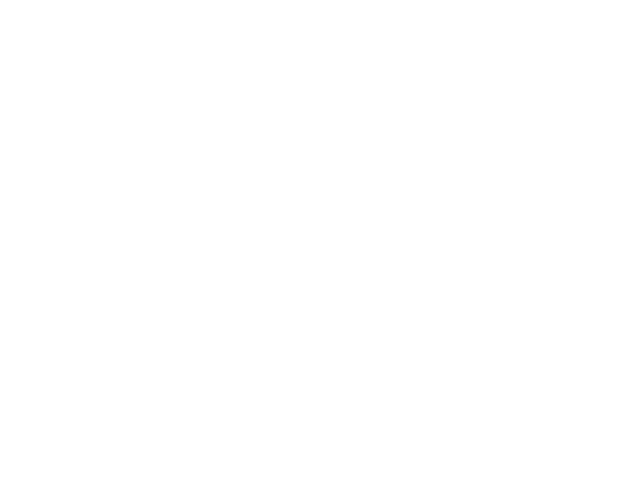

In [12]:
from numpy import linalg as LA
vrcomps = np.array([np.diff(x), np.diff(y), np.diff(z)])
vrcomps = vrcomps.transpose()
f,a = plt.subplots()
# velocity magnitude of right hand for example
vrmag = LA.norm(vrcomps, axis=1, ord=1)
acccomps = np.array([np.diff(np.diff(x)),np.diff(np.diff(y)),np.diff(np.diff(z)),])
acccomps = acccomps.transpose()
accmag = LA.norm(acccomps,axis =1,ord =1)
plt.plot(vrmag)
plt.plot(accmag, color = 'grey')

In [13]:
from numpy import linalg as LA
vrcomps = np.array([np.square(np.diff(x)), np.square(np.diff(y)), np.square(np.diff(z))])
vrcomps = vrcomps.transpose()

# velocity magnitude of right hand for example
vrmag = LA.norm(vrcomps, axis=1, ord=2)


In [14]:
partLabels = []
for i in range(len(tracings)):
    partLabels.append(int(returnDetails(tracings[i])['partID']))

In [15]:
partLabels = numpy.array(partLabels)

In [16]:
numpy.save('partLabels',partLabels, allow_pickle=True)

In [17]:
numpy.save('motiondata',p, allow_pickle = True)

In [18]:
mLabels = numpy.load('melodiesLabels.npy')

In [19]:
mLabels

array([11,  7,  9,  1, 11,  3, 10,  8,  7, 10, 16,  8, 11, 10,  6, 13, 12,
        4, 16, 14,  8,  8,  6, 11,  9, 15,  3, 14,  1, 16, 16, 14,  1, 15,
       12,  1, 10,  5,  1,  8, 13, 15, 10,  9,  9, 12, 16, 15, 14, 12,  4,
        1,  5,  8,  6, 13, 14, 12,  4,  3, 15,  2, 14,  1, 12,  3,  3, 13,
       16, 16,  7, 14,  7, 11, 10,  9,  5,  7, 11,  6,  3,  8, 13,  7,  1,
        5,  5,  4,  4, 12, 12,  4, 13,  6,  7,  7,  7,  4,  3, 12,  9,  8,
       11,  4, 10,  2,  6, 12,  2,  9,  7,  3, 16,  4,  3,  4, 13, 13,  4,
        8,  2, 12, 13,  7,  5, 13, 10,  4,  3,  8,  9, 15,  2,  8, 15,  8,
       14, 14, 14,  9, 10, 11,  9,  6,  9, 15, 13,  7, 13, 14,  1, 15,  1,
        1,  6, 14,  2, 12, 15, 14,  6, 13, 11,  4, 16,  3, 14, 16, 12,  5,
       14,  1,  5,  7,  1, 14, 15,  3, 11, 10,  2,  8,  3,  2,  6,  1,  7,
        1, 11,  1,  4,  6,  4, 12, 14,  6,  5,  2,  6,  1, 12,  3,  4, 12,
        4, 12,  4, 15, 15, 14,  7,  2, 12, 12, 11,  2, 11, 16,  5, 16, 10,
       16,  3,  6, 11, 10

In [20]:
melodies = []
for i in range(len(tracings)):
    melodies.append(int(returnDetails(tracings[i])['melID']))

In [21]:
for i in range(len(melodies)):
    if melodies[i]>16:
        melodies[i] = melodies[i]-16

In [22]:
melodies = numpy.array(melodies)
numpy.save('origVreSyn',melodies,allow_pickle=True)

In [23]:
melodies= pd.DataFrame(melodies)

In [24]:
%matplotlib inline

NameError: name 'melodi' is not defined

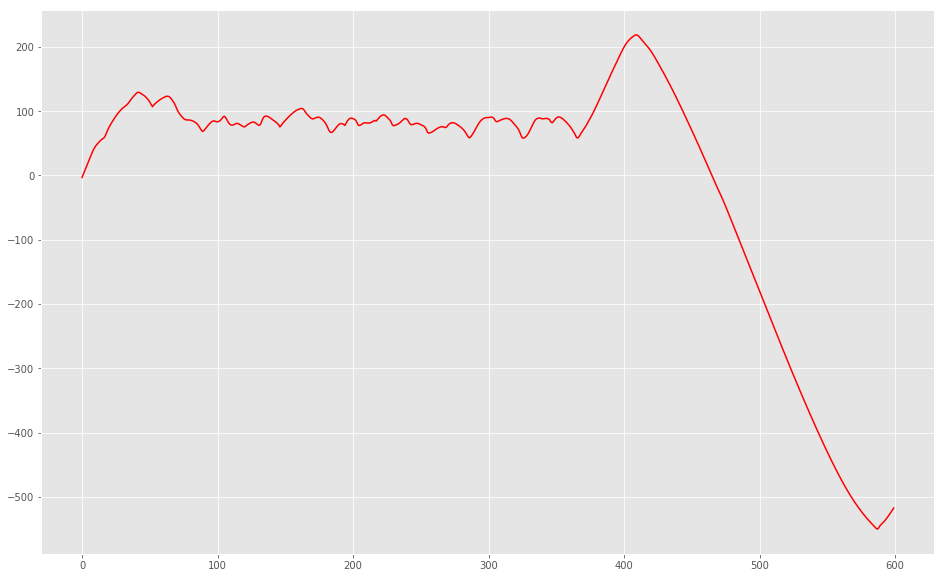

In [25]:
import random
for i in range(20):
    num = random.randint(1, 700)
    val = p[num,:,1]
    f,ax = plt.subplots(figsize = (16,10))
    ax = plt.plot(val,color = 'red')
    ax = plt.plot(melodi[num,:,0],color = 'blue')
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize = 22)
    f.suptitle('Melody '+ mLabels[num], fontsize=22)

In [ ]:
melodies.to_csv('melodies794')

In [ ]:
melodi = numpy.load('melodiesFeatures.npy')

In [ ]:
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['im','jo','sc','vo'],
'pitch': pitchPerGenre,
'rms': lv2,
'specCent': av2,
'numberofNotes': notesPerGenre,
# 'mfcc': [28, 15, 32, 14]
})
 
 
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure(figsize=(12,12))
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, fontsize = 22)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([-1,0,1], ["-1",'0',"1"], color="grey", size=10, fontsize = 22)
plt.ylim(-2,2)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Indian Music",color = 'blue')
ax.fill(angles, values, 'b', alpha=0.1, color = 'blue')
 
# Ind2
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Joik",color = 'red')
ax.fill(angles, values, 'r', alpha=0.1, color = 'red')
 
values=df.loc[2].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Scat",color = 'green')
ax.fill(angles, values, 'r', alpha=0.1, color = 'green')
 
values=df.loc[3].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Vocalise",color = 'yellow')
ax.fill(angles, values, 'r', alpha=0.1, color = 'yellow')
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize = 22)


## Parsons code make